In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [60]:
def least_squares(y,tx):
    """
    Linear regression using normal equations
    :param y: np.array: (n, ): array containing the target variable values of n record
    :param tx: np.array: (n, d): array containing the (normalised) indepent variable values of n records
    """
    #Compute Gram Matrix
    gram = tx.T.dot(tx)

    #Solve the linear system from normal equations
    w = np.linalg.solve(gram,tx.T.dot(y))

    #Compute loss
    loss = compute_loss_mse(y,tx,w)
    
    return(loss,w)



### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [16]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    loss, w = least_squares(y,tx)
    
    
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_train,x_train,y_test,x_test = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # **************************************************
    aug_train = build_poly(x_train,degree)
    aug_test = build_poly(x_test,degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w,loss = ridge_regression(y_train,aug_train, lambda_)
        loss = np.sqrt(2*loss)
        rmse_tr.append(loss)
        
        w,loss = ridge_regression(y_test,aug_test, lambda_)
    print(loss,w)

Test it here

In [5]:
test_your_least_squares()

NameError: name 'split_data' is not defined

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [70]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [77]:
def build_poly(x, degree):
    aug = np.empty([x.shape[0],degree+1])
    aug[:,0] = 1
    for j in range(1,degree+1):
        for i,xn in enumerate(x):
            aug[i,j] = np.power(xn,j)
    return aug

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [75]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        aug = build_poly(x,degree)
      
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse,weights = least_squares(y,aug) 
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.4718760796342188
Processing 2th experiment, degree=3, rmse=0.258582776677375
Processing 3th experiment, degree=7, rmse=0.24965870360907347
Processing 4th experiment, degree=12, rmse=0.24337224835787005


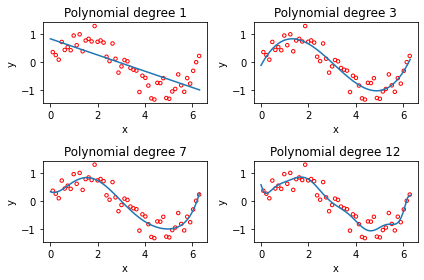

In [79]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [80]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    num_samples = len(y)
    num_train = int(np.ceil(num_samples*ratio))
    shuff_indices = np.random.permutation(num_samples)
    shuff_y = y[shuff_indices]
    shuff_x = x[shuff_indices]
    return (shuff_y[:num_train],shuff_x[:num_train], shuff_y[num_train:], shuff_x[num_train:])
    
   

Then, test your `split_data` function below.

In [100]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_train,x_train,y_test,x_test = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    aug_train = build_poly(x_train,degree)
    aug_test = build_poly(x_test,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    loss,w = least_squares(y_train,aug_train)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*loss)
    rmse_te = np.sqrt(2*compute_loss_mse(y_test,aug_test,w))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [101]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.254
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.531
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.990
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.911


# 3 Ridge Regression
Please fill in the function below.

In [81]:
def ridge_regression(y, tx, lambda_):
    """
    Normal equations using L2 regularization
    :param y: np.array: (n, ): array containing the target variable values of n record
    :param tx: np.array: (n, d): array containing the (normalised) indepent variable values of n records
    :param lambda_: float: penalty parameter
    """
    assert lambda_ > 0, "Penalty factor must be positive."
    
    #Compute Gram matrix
    gram = tx.T.dot(tx)
    
    #Compute identity dxd matrix
    eye =  np.identity(tx.shape[1])

    #Compute lambda prime as lamda*2N
    plambda = lambda_*(2*tx.shape[0])

    #Solve the linear system from normal equation using L2 regularization
    w = np.linalg.solve((gram + plambda*eye), tx.T.dot(y))

    #Compute loss
    loss = compute_loss_mse(y,tx,w)
    
    return(loss,w)

In [96]:
from plots import *
from build_polynomial import *
from helpers import *

def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_train,x_train,y_test,x_test = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # **************************************************
    aug_train = build_poly(x_train,degree)
    aug_test = build_poly(x_test,degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        
        #find w with train data
        loss,w = ridge_regression(y_train,aug_train, lambda_)
        loss = np.sqrt(2*loss)
        rmse_tr.append(loss)
        
        #calculate rmse for test data
        loss = np.sqrt(2*compute_loss_mse(y_test,aug_test,w))
        rmse_te.append(loss)
        #print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
             #  p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


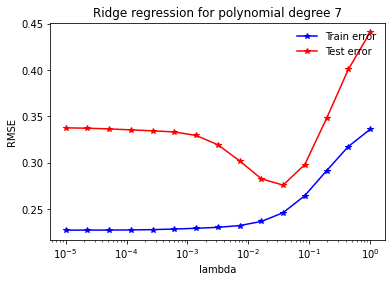

In [97]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)